<heading><b>Classification Model Development (Individual)</b></heading>
<body>Machine Learning | MsBA | Hult International Business School<br>
Wai Hoi Li
</body>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h1>Libraries, user-defined functions and data import</h1>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h2>Libraries import</h2>

In [1]:
# libraries import
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import statsmodels.formula.api as smf
import gender_guesser.detector as gender
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression 
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

# CART model packages
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO                             # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer

# Ensemble Modelind
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

<h2>Data import and print options setting</h2>

In [2]:
# print options setting and load file
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

file = "./datasets/Apprentice_Chef_Dataset.xlsx"

Achef = pd.read_excel(io = file)

<h2>User-Defined function loading</h2>

In [3]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):

    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

<h1>Data prepping</h1>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [4]:
# print out the first 5 rows to investigate what types of data are in the dataframe
Achef.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


In [5]:
# Find out is there any missing value in the dataset
Achef.isnull().sum(axis = 0)

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

In [6]:
# Fill in the missing value in the dataset with 0
Achef['FAMILY_NAME'] = Achef['FAMILY_NAME'].fillna(0)
Achef.isnull().any().any()

False

In [7]:
# placeholder list
placeholder_lst = []

# looping over each Achef_data address
for index, col in Achef.iterrows():
    
    # splitting email domain at '@'
    split_email = Achef.loc[index, 'EMAIL'].split(sep = "@")
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)
email_df.columns = ['NAME','DOMAIN_NAME']

# assign the domain name result to the dataset
Achef['DOMAIN_NAME'] = email_df.loc[:,'DOMAIN_NAME']

# displaying the results
Achef['DOMAIN_NAME']

0       unitedhealth.com
1                 ge.org
2                jnj.com
3                 ge.org
4                jnj.com
              ...       
1941           yahoo.com
1942           yahoo.com
1943           gmail.com
1944           yahoo.com
1945           merck.com
Name: DOMAIN_NAME, Length: 1946, dtype: object

In [8]:
# Categorize all domain into 3 category based on provided list
professional_email = ['mmm.com', 'amex.com', 'apple.com', 'boeing.com', 'caterpillar.com', 'chevron.com', 
                      'cisco.com', 'cocacola.com', 'disney.com', 'dupont.com', 'exxon.com', 'ge.org', 
                      'goldmansacs.com', 'homedepot.com', 'ibm.com', 'intel.com', 'jnj.com', 'jpmorgan.com', 
                      'mcdonalds.com', 'merck.com', 'microsoft.com', 'nike.com', 'pfizer.com', 'pg.com', 
                      'travelers.com', 'unitedtech.com', 'unitedhealth.com', 'verizon.com', 'visa.com', 
                      'walmart.com']

personal_email = ['gmail.com', 'yahoo.com', 'protonmail.com']

junk_email = ['me.com', 'aol.com', 'hotmail.com', 'live.com', 'msn.com', 'passport.com']

In [9]:
# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in Achef['DOMAIN_NAME']:
    
    if domain in professional_email:
        placeholder_lst.append('professional')
        

    elif domain in personal_email:
        placeholder_lst.append('personal')        

        
    elif domain in junk_email:
        placeholder_lst.append('junk')


    else:
            print('unknown')


# concatenating with original DataFrame
Achef['DOMAIN_GROUP'] = pd.Series(placeholder_lst)


# checking results
Achef['DOMAIN_GROUP'].value_counts()

personal        861
professional    696
junk            389
Name: DOMAIN_GROUP, dtype: int64

In [10]:
# create dummies for the domain names and check for top 5 results
domain_dummies = pd.get_dummies(Achef['DOMAIN_GROUP'])
Achef = Achef.join([domain_dummies])
Achef.iloc[0:5, -3:]

,junk,personal,professional
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [11]:
# Create ratio to investigate the dataset
Achef['Torder_vs_productViewed'] = Achef['TOTAL_MEALS_ORDERED']/Achef['PRODUCT_CATEGORIES_VIEWED']
Achef['UMeal_vs_productViewed'] = Achef['UNIQUE_MEALS_PURCH']/Achef['PRODUCT_CATEGORIES_VIEWED']
Achef['decision_time'] = Achef['TOTAL_MEALS_ORDERED']/Achef['AVG_TIME_PER_SITE_VISIT']
Achef['UMeal_vs_Torder'] = Achef['UNIQUE_MEALS_PURCH']/Achef['TOTAL_MEALS_ORDERED']
Achef['Torder_vs_Revenue'] = Achef['TOTAL_MEALS_ORDERED']/Achef['REVENUE']
Achef['UMeal_vs_Revenue'] = Achef['UNIQUE_MEALS_PURCH']/Achef['REVENUE']
Achef['Tcancel_vs_Torder'] = (Achef['CANCELLATIONS_BEFORE_NOON']+ Achef['CANCELLATIONS_AFTER_NOON'])/Achef['TOTAL_MEALS_ORDERED']
Achef['WPlan_vs_Torder'] = Achef['WEEKLY_PLAN']/Achef['TOTAL_MEALS_ORDERED']
Achef['WPlan_vs_UMeal'] = Achef['WEEKLY_PLAN']/Achef['UNIQUE_MEALS_PURCH']
Achef['Contact_vs_Torder'] = Achef['CONTACTS_W_CUSTOMER_SERVICE']/Achef['TOTAL_MEALS_ORDERED']
Achef['Contact_vs_UMeal'] = Achef['CONTACTS_W_CUSTOMER_SERVICE']/Achef['UNIQUE_MEALS_PURCH']

In [12]:
# if the number fall above the 75% percentile or below 25% percentile, will marks as one, else zero
#perce_achef = Achef.describe(include = 'number').round(2)
prece_Achef_data = Achef.drop(['NAME','EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'DOMAIN_NAME', 'DOMAIN_GROUP'],
                                axis = 1)
perce_achef = Achef.describe(include = 'number').round(2)

per_25 = perce_achef.loc['25%']
per_25_df = per_25.to_frame()
per_50 = perce_achef.loc['50%']
per_50_df = per_50.to_frame()
per_75 = perce_achef.loc['75%']
per_75_df = per_75.to_frame()

Achef['CROSS_SELL_REVENUE']   = 0
for r in range(0,Achef.shape[0]):
        if prece_Achef_data.iloc[r,0] < per_25_df.iloc[0,0] and prece_Achef_data.iloc[r, 1] == 1:
            Achef.loc[r,'CROSS_SELL_REVENUE'] = 1
        elif prece_Achef_data.iloc[r,0] >= per_25_df.iloc[0,0] and prece_Achef_data.iloc[r,0] < per_50_df.iloc[0,0] and prece_Achef_data.iloc[r, 1] == 1:
            Achef.loc[r,'CROSS_SELL_REVENUE'] = 2
        elif prece_Achef_data.iloc[r,0] >= per_50_df.iloc[0,0] and prece_Achef_data.iloc[r,0] < per_75_df.iloc[0,0] and prece_Achef_data.iloc[r, 1] == 1:
            Achef.loc[r,'CROSS_SELL_REVENUE'] = 3
        elif prece_Achef_data.iloc[r,0] >= per_75_df.iloc[0,0]:
            Achef.loc[r,'CROSS_SELL_REVENUE'] = 4
        else:
            Achef.loc[r,'CROSS_SELL_REVENUE'] = 0

Achef['CROSS_SELL_REVENUE'].value_counts()

4    490
0    462
3    347
2    340
1    307
Name: CROSS_SELL_REVENUE, dtype: int64

<h1>Model building</h1>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Correlation Analysis</h2>
<body>
</body>

In [13]:
df_corr = Achef.corr().round(2)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
CROSS_SELL_REVENUE             0.46
professional                   0.19
CANCELLATIONS_BEFORE_NOON      0.16
MOBILE_NUMBER                  0.10
Tcancel_vs_Torder              0.10
TASTES_AND_PREFERENCES         0.08
REFRIGERATED_LOCKER            0.07
CONTACTS_W_CUSTOMER_SERVICE    0.04
PC_LOGINS                      0.04
PACKAGE_LOCKER                 0.04
personal                       0.04
MASTER_CLASSES_ATTENDED        0.04
MEDIAN_MEAL_RATING             0.03
AVG_PREP_VID_TIME              0.03
EARLY_DELIVERIES               0.02
LARGEST_ORDER_SIZE             0.02
Torder_vs_Revenue              0.02
TOTAL_PHOTOS_VIEWED            0.01
TOTAL_MEALS_ORDERED            0.01
Torder_vs_productViewed        0.01
WPlan_vs_UMeal                 0.01
LATE_DELIVERIES                0.01
AVG_TIME_PER_SITE_VISIT        0.01
UNIQUE_MEALS_PURCH             0.00
PRODUCT_CATEGORIES_VIEWED      0.00
REVENUE                        0.00
decision_time               

<body>
<h2>Set target and data, and split training and test dataset</h2>
</body>

In [14]:
# declaring explanatory variables
Achef_data = Achef.drop('CROSS_SELL_SUCCESS', axis = 1)


# declaring response variable
Achef_target = Achef.loc[ : , 'CROSS_SELL_SUCCESS']

In [15]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            Achef_data,
            Achef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = Achef_target)


# merging training data for statsmodels
Achef_train = pd.concat([x_train, y_train], axis = 1)

In [16]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



<boday>
<h2>Logistic Regression</h2>
</body>

In [17]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """   CROSS_SELL_SUCCESS ~ 
                                             REVENUE + 
                                             TOTAL_MEALS_ORDERED + 
                                             CONTACTS_W_CUSTOMER_SERVICE + 
                                             MOBILE_NUMBER + 
                                             CANCELLATIONS_BEFORE_NOON + 
                                             TASTES_AND_PREFERENCES + 
                                             PC_LOGINS + 
                                             EARLY_DELIVERIES + 
                                             REFRIGERATED_LOCKER + 
                                             junk + 
                                             professional + 
                                             Torder_vs_Revenue + 
                                             CROSS_SELL_REVENUE""",
                                         data    = Achef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.330224
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1445
Method:                           MLE   Df Model:                           13
Date:                Sun, 14 Feb 2021   Pseudo R-squ.:                  0.4741
Time:                        23:51:38   Log-Likelihood:                -481.80
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                2.502e-177
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -3.3234      0.989     -3.359      0.001      -5.263      -1.384
REVENUE                        -0.0012      0.000     -8.059      0.000      -0.002      -0.001
TOTAL_MEALS_ORDERED            -0.0167      0.004     -4.242      0.000      -0.024      -0.009
CONTACTS_W_CUSTOMER_SERVICE     0.0708      0.038      1.861      0.063      -0.004       0.145
MOBILE_NUMBER                   0.9400      0.240      3.924      0.000       0.470       1.410
CANCELLATIONS_BEFORE_NOON       0.2677      0.062      4.340      0.000       0.147       0.389
TASTES_AND_PREFERENCES          0.3432      0.186      1.849      0.064      -0.021       0.707
PC_LOGINS                       0.2226      0.145      1.531      0.126      -0.062       0.508
EARLY_DELIVERIES                0.0410      0.038      1.088      0.276      -0.033       0.115
REFRIGERATED_LOCKER             0.3724      0.281      1.324      0.185      -0.179       0.923
junk                           -1.0596      0.221     -4.804      0.000      -1.492      -0.627
professional                    0.7006      0.193      3.636      0.000       0.323       1.078
Torder_vs_Revenue              35.6213      9.507      3.747      0.000      16.987      54.256
CROSS_SELL_REVENUE              1.8569      0.096     19.341      0.000       1.669       2.045
===============================================================================================
"""

In [18]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : [ 'REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',  
                    'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',  
                    'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',  
                    'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS',  
                    'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',  
                    'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME',  
                    'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 
                    'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'junk', 'personal',  
                    'professional', 'Torder_vs_productViewed', 'UMeal_vs_productViewed',  
                    'decision_time', 'UMeal_vs_Torder', 'Torder_vs_Revenue',  
                    'UMeal_vs_Revenue', 'Tcancel_vs_Torder', 'WPlan_vs_Torder', 'WPlan_vs_UMeal'
                    'Contact_vs_Torder', 'Contact_vs_UMeal', 'CROSS_SELL_REVENUE'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['REVENUE', 'TOTAL_MEALS_ORDERED', 
                   'CONTACTS_W_CUSTOMER_SERVICE', 'MOBILE_NUMBER', 
                   'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES', 
                   'PC_LOGINS', 'EARLY_DELIVERIES', 'REFRIGERATED_LOCKER', 
                   'junk', 'professional', 'Torder_vs_Revenue','CROSS_SELL_REVENUE'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['REVENUE', 'TOTAL_MEALS_ORDERED', 
                   'CONTACTS_W_CUSTOMER_SERVICE', 'MOBILE_NUMBER', 
                   'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES', 
                   'PC_LOGINS', 'EARLY_DELIVERIES', 'REFRIGERATED_LOCKER', 
                   'junk', 'professional', 'Torder_vs_Revenue','CROSS_SELL_REVENUE']

}

In [19]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """CROSS_SELL_SUCCESS ~ junk""",
                           data    = Achef_train)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.590544
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1457
Method:                           MLE   Df Model:                            1
Date:                Sun, 14 Feb 2021   Pseudo R-squ.:                 0.05958
Time:                        23:51:38   Log-Likelihood:                -861.60
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 1.483e-25
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0659      0.067     15.922      0.000       0.935       1.197
junk          -1.4166      0.137    -10.331      0.000      -1.685      -1.148
==============================================================================
"""

In [20]:
for val in Achef_data.describe().keys():
    print(f" {val} + ")

 REVENUE + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 MOBILE_NUMBER + 
 CANCELLATIONS_BEFORE_NOON + 
 CANCELLATIONS_AFTER_NOON + 
 TASTES_AND_PREFERENCES + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 EARLY_DELIVERIES + 
 LATE_DELIVERIES + 
 PACKAGE_LOCKER + 
 REFRIGERATED_LOCKER + 
 AVG_PREP_VID_TIME + 
 LARGEST_ORDER_SIZE + 
 MASTER_CLASSES_ATTENDED + 
 MEDIAN_MEAL_RATING + 
 AVG_CLICKS_PER_VISIT + 
 TOTAL_PHOTOS_VIEWED + 
 junk + 
 personal + 
 professional + 
 Torder_vs_productViewed + 
 UMeal_vs_productViewed + 
 decision_time + 
 UMeal_vs_Torder + 
 Torder_vs_Revenue + 
 UMeal_vs_Revenue + 
 Tcancel_vs_Torder + 
 WPlan_vs_Torder + 
 WPlan_vs_UMeal + 
 Contact_vs_Torder + 
 Contact_vs_UMeal + 
 CROSS_SELL_REVENUE + 


In [21]:
# train/test split with the full model
Achef_data   =  Achef.loc[ : , candidate_dict['logit_sig_2']]
Achef_target =  Achef.loc[ : , 'CROSS_SELL_SUCCESS']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            Achef_data,
            Achef_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = Achef_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.9095
LogReg Testing  ACCURACY: 0.8727
LogReg Train-Test Gap   : 0.0368


/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 109
False Positives: 47
False Negatives: 15
True Positives : 316



In [23]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)


0.8267


<body>
<h2>Full Tree Model</h2>
</body>

In [24]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                    y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                    y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 1.0
Full Tree Testing ACCURACY : 0.8686
Full Tree AUC Score: 0.8338


In [25]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 115
False Positives: 41
False Negatives: 23
True Positives : 308



<body>
<h2>Purned Tree Model</h2>
</body>

In [26]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 4,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.9253
Testing  ACCURACY: 0.8891
AUC Score        : 0.8269


In [27]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 102
False Positives: 54
False Negatives: 0
True Positives : 331



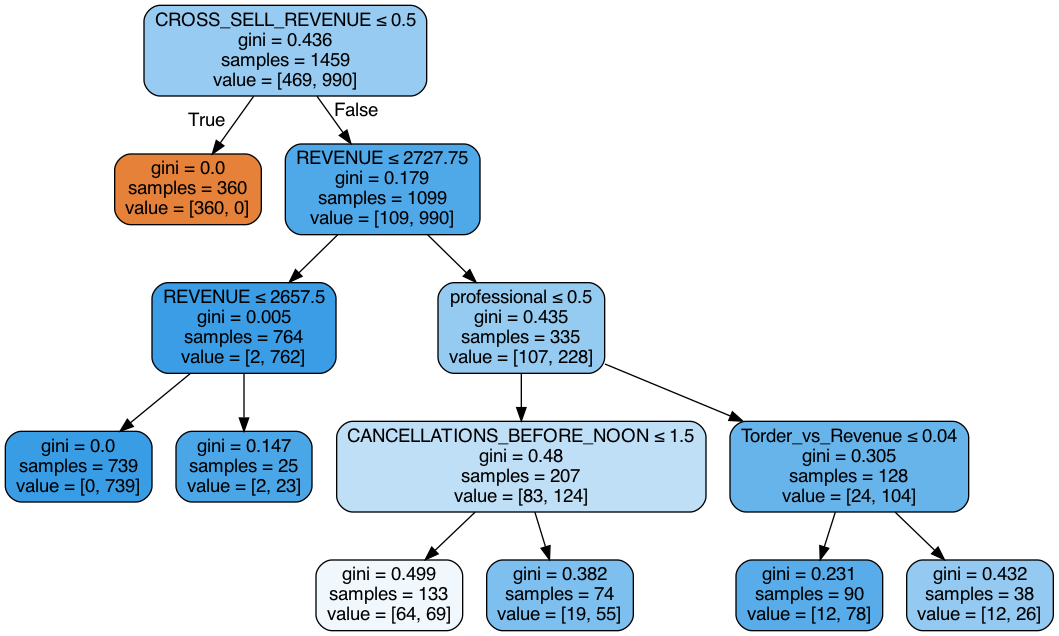

In [28]:
# calling display_tree
display_tree(tree       = pruned_tree_fit,
             feature_df = x_train)

In [29]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}          {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)

# show result
model_performance.head(n = 5)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.8267         (109, 47, 15, 316)
Full Tree     0.8338          (115, 41, 23, 308)
Pruned Tree   0.8269         (102, 54, 0, 331)



,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.8267,0.9095,0.8727,"(109, 47, 15, 316)"
1,Full Tree,0.8338,1.0000,0.8686,"(115, 41, 23, 308)"
2,Pruned Tree,0.8269,0.9253,0.8891,"(102, 54, 0, 331)"


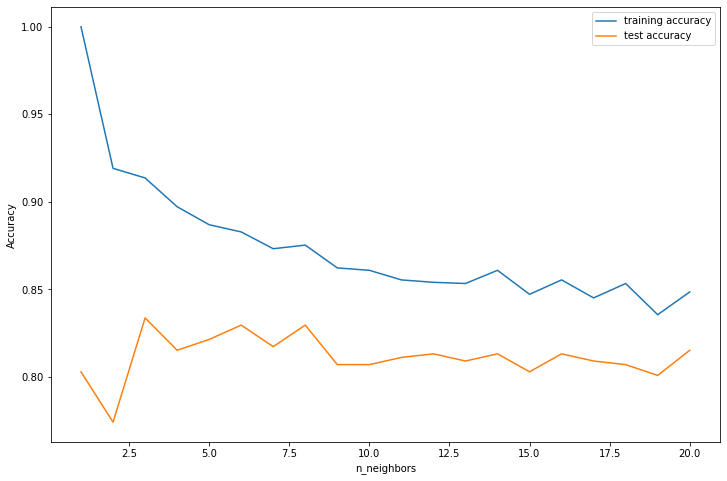

The optimal number of neighbors is: 3


In [30]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(X_data        = Achef_data,
                                  y_data        = Achef_target,
                                  response_type = 'class')

<body>
<h2>KNN Model</h2>
</body>

In [31]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(Achef_data)


# TRANSFORMING the data
X_scaled     = scaler.transform(Achef_data)


# converting to a DataFrame
X_scaled_df  = pd.DataFrame(X_scaled) 


# train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            X_scaled_df,
            Achef_target,
            random_state = 219,
            test_size = 0.25,
            stratify = Achef_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(X_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(X_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(X_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(X_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(X_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(X_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.9164
Testing  ACCURACY: 0.8008
AUC Score        : 0.7349


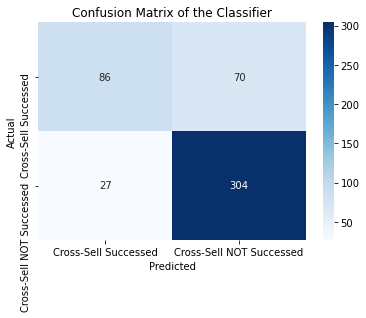

In [32]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['Cross-Sell Successed', 'Cross-Sell NOT Successed'])

In [33]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tree_tn}
False Positives: {knn_tree_fp}
False Negatives: {knn_tree_fn}
True Positives : {knn_tree_tp}
""")


True Negatives : 86
False Positives: 70
False Negatives: 27
True Positives : 304



In [34]:
# declaring model performance objects
knn_train_acc = knn_fit.score(x_train, y_train).round(4)
knn_test_acc  = knn_fit.score(x_test, y_test).round(4)
knn_auc       = roc_auc_score(y_true  = y_test,
                              y_score = knn_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'KNN',
                          'Training Accuracy'  : knn_train_score,
                          'Testing Accuracy'   : knn_test_score,
                          'AUC Score'          : knn_auc_score,
                          'Confusion Matrix'   : (knn_tree_tn,
                                                  knn_tree_fp,
                                                  knn_tree_fn,
                                                  knn_tree_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.8267,0.9095,0.8727,"(109, 47, 15, 316)"
1,Full Tree,0.8338,1.0000,0.8686,"(115, 41, 23, 308)"
2,Pruned Tree,0.8269,0.9253,0.8891,"(102, 54, 0, 331)"
3,KNN,0.7349,0.9164,0.8008,"(86, 70, 27, 304)"


<body>
<h2>LR Model</h2>
</body>

In [35]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)

In [36]:
# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

Training ACCURACY: 0.9095
Testing  ACCURACY: 0.8727
AUC Score        : 0.8267


/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


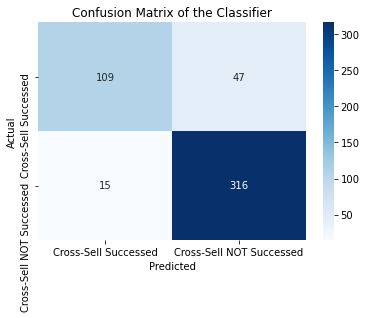

In [37]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = lr_default_pred,
          labels = ['Cross-Sell Successed', 'Cross-Sell NOT Successed'])

In [38]:
# unpacking the confusion matrix
lr_tn, \
lr_fp, \
lr_fn, \
lr_tp = confusion_matrix(y_true = y_test, y_pred = lr_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tn}
False Positives: {lr_fp}
False Negatives: {lr_fn}
True Positives : {lr_tp}
""")


True Negatives : 109
False Positives: 47
False Negatives: 15
True Positives : 316



<body>
<h2>Tuned LR Model</h2>
</body>

In [39]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 5.0, 0.1)
warm_start_space = [True, False]
solver_space     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space,
              'solver'     : solver_space}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 1000)


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 10,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(Achef_data, Achef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

<ipython-input-39-f3fb2313732b>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  C_space          = pd.np.arange(0.1, 5.0, 0.1)
/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/l

Tuned Parameters  : {'warm_start': False, 'solver': 'lbfgs', 'C': 0.2}
Tuned CV AUC      : 0.8477


In [40]:
lr_tuned_cv.best_estimator_

LogisticRegression(C=0.2, max_iter=1000, random_state=219)

In [41]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = lr_tuned_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

LR Tuned Training ACCURACY: 0.902
LR Tuned Testing  ACCURACY: 0.8645
LR Tuned AUC Score        : 0.8156


In [42]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 106
False Positives: 50
False Negatives: 16
True Positives : 315



In [43]:
# declaring model performance objects
lr_train_acc = lr_tuned.score(x_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(x_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_train_acc,
                           'Testing Accuracy'  : lr_test_acc,
                           'AUC Score'         : lr_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.8267,0.9095,0.8727,"(109, 47, 15, 316)"
1,Full Tree,0.8338,1.0000,0.8686,"(115, 41, 23, 308)"
2,Pruned Tree,0.8269,0.9253,0.8891,"(102, 54, 0, 331)"
3,KNN,0.7349,0.9164,0.8008,"(86, 70, 27, 304)"
4,Tuned LR,0.8156,0.9020,0.8645,"(106, 50, 16, 315)"


<body>
<h2>Tuned Tree Model</h2>
</body>

In [44]:
# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 25, 1)
leaf_space      = pd.np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 10,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(Achef_data, Achef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 50, 'max_depth': 15, 'criterion': 'entropy'}
Tuned Training AUC: 0.8917


<ipython-input-44-a140fe23158c>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space     = pd.np.arange(1, 25, 1)
<ipython-input-44-a140fe23158c>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space      = pd.np.arange(1, 100, 1)


In [45]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = tuned_tree_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.9287
Testing  ACCURACY: 0.9138
AUC Score        : 0.8874


In [46]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 127
False Positives: 29
False Negatives: 13
True Positives : 318



In [47]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.8267,0.9095,0.8727,"(109, 47, 15, 316)"
1,Full Tree,0.8338,1.0000,0.8686,"(115, 41, 23, 308)"
2,Pruned Tree,0.8269,0.9253,0.8891,"(102, 54, 0, 331)"
3,KNN,0.7349,0.9164,0.8008,"(86, 70, 27, 304)"
4,Tuned LR,0.8156,0.9020,0.8645,"(106, 50, 16, 315)"
5,Tuned Tree,0.8874,0.9287,0.9138,"(127, 29, 13, 318)"


<body>
<h2>Random Forest Model</h2>
</body>

In [48]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [49]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 1.0
Testing  ACCURACY: 0.8871
AUC Score        : 0.8373


In [50]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 109
False Positives: 47
False Negatives: 8
True Positives : 323



In [51]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.8267,0.9095,0.8727,"(109, 47, 15, 316)"
1,Full Tree,0.8338,1.0000,0.8686,"(115, 41, 23, 308)"
2,Pruned Tree,0.8269,0.9253,0.8891,"(102, 54, 0, 331)"
3,KNN,0.7349,0.9164,0.8008,"(86, 70, 27, 304)"
4,Tuned LR,0.8156,0.9020,0.8645,"(106, 50, 16, 315)"
5,Tuned Tree,0.8874,0.9287,0.9138,"(127, 29, 13, 318)"
6,Random Forest (Full),0.8373,1.0000,0.8871,"(109, 47, 8, 323)"


<body>
<h2>Tuned Random Forest Model</h2>
</body>

In [52]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# declaring a hyperparameter space
estimator_space  = pd.np.arange(100, 1100, 250)
leaf_space       = pd.np.arange(1, 31, 10)
criterion_space  = ['gini', 'entropy']
bootstrap_space  = [True, False]
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'min_samples_leaf' : leaf_space,
              'criterion'        : criterion_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 3,
                               n_iter     = 10,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(Achef_data, Achef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

<ipython-input-52-b3aed5abe0a1>:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  estimator_space  = pd.np.arange(100, 1100, 250)
<ipython-input-52-b3aed5abe0a1>:11: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space       = pd.np.arange(1, 31, 10)


Tuned Parameters  : {'warm_start': False, 'n_estimators': 850, 'min_samples_leaf': 1, 'criterion': 'entropy', 'bootstrap': True}
Tuned Training AUC: 0.8801


In [53]:
# best estimators based on RandomizedSearchCV
forest_cv.best_estimator_

RandomForestClassifier(criterion='entropy', n_estimators=850, random_state=219)

In [54]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = forest_cv.best_estimator_


# FIT step not needed


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 1.0
Forest Tuned Testing  ACCURACY: 1.0
Forest Tuned AUC Score        : 1.0


In [55]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 156
False Positives: 0
False Negatives: 0
True Positives : 331



In [56]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 156
False Positives: 0
False Negatives: 0
True Positives : 331



<body>
<h2>GBM Model</h2>
</body>

In [57]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.9698
Testing ACCURACY : 0.8973
AUC Score        : 0.855


In [58]:
# unpacking the confusion matrix
gbm_tn, \
gbm_fp, \
gbm_fn, \
gbm_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tn}
False Positives: {gbm_fp}
False Negatives: {gbm_fn}
True Positives : {gbm_tp}
""")


True Negatives : 115
False Positives: 41
False Negatives: 9
True Positives : 322



In [59]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_tn,
                                                 gbm_fp,
                                                 gbm_fn,
                                                 gbm_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.8267,0.9095,0.8727,"(109, 47, 15, 316)"
1,Full Tree,0.8338,1.0000,0.8686,"(115, 41, 23, 308)"
2,Pruned Tree,0.8269,0.9253,0.8891,"(102, 54, 0, 331)"
3,KNN,0.7349,0.9164,0.8008,"(86, 70, 27, 304)"
4,Tuned LR,0.8156,0.9020,0.8645,"(106, 50, 16, 315)"
5,Tuned Tree,0.8874,0.9287,0.9138,"(127, 29, 13, 318)"
6,Random Forest (Full),0.8373,1.0000,0.8871,"(109, 47, 8, 323)"
7,GBM (Full),0.8550,0.9698,0.8973,"(115, 41, 9, 322)"


In [60]:
# declaring a hyperparameter space
learn_space        = pd.np.arange(0.1, 2.0, 0.2)
estimator_space    = pd.np.arange(100, 200, 25)
depth_space        = pd.np.arange(1, 20, 2)
warm_start_space   = [True, False]

# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_space,
              'max_depth'     : depth_space,
              'n_estimators'  : estimator_space,
              'warm_start'     : warm_start_space}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 10,
                           random_state        = 219,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(Achef_data, Achef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

<ipython-input-60-d996eca39344>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  learn_space        = pd.np.arange(0.1, 2.0, 0.2)
<ipython-input-60-d996eca39344>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  estimator_space    = pd.np.arange(100, 200, 25)
<ipython-input-60-d996eca39344>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space        = pd.np.arange(1, 20, 2)


Tuned Parameters  : {'warm_start': False, 'n_estimators': 150, 'max_depth': 9, 'learning_rate': 1.3000000000000003}
Tuned Training AUC: 0.8815


<body>
<h2>Tuned GBM Model</h2>
</body>

In [61]:
# checking the best estimator for the model
full_gbm_cv.best_estimator_

GradientBoostingClassifier(learning_rate=1.3000000000000003, max_depth=9,
                           n_estimators=150, random_state=219)

In [62]:
# INSTANTIATING the model object without hyperparameters

# I made several attempts to hyperparameter tuning
gbm_tuned = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.7000000000000001, loss='deviance',
                           max_depth=1, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=125,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=219, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=True)

# FIT step is needed as we are not using .best_estimator
gbm_tuned_fit = gbm_tuned.fit(x_train, y_train)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.9513
Testing  ACCURACY: 0.8912
AUC Score        : 0.8522


In [63]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 116
False Positives: 40
False Negatives: 13
True Positives : 318



In [64]:
# declaring model performance objects
gbm_tuned_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_tuned_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_tuned_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM',
                          'Training Accuracy'  : gbm_tuned_train_acc,
                          'Testing Accuracy'   : gbm_tuned_test_acc,
                          'AUC Score'          : gbm_tuned_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.8267,0.9095,0.8727,"(109, 47, 15, 316)"
1,Full Tree,0.8338,1.0000,0.8686,"(115, 41, 23, 308)"
2,Pruned Tree,0.8269,0.9253,0.8891,"(102, 54, 0, 331)"
3,KNN,0.7349,0.9164,0.8008,"(86, 70, 27, 304)"
4,Tuned LR,0.8156,0.9020,0.8645,"(106, 50, 16, 315)"
5,Tuned Tree,0.8874,0.9287,0.9138,"(127, 29, 13, 318)"
6,Random Forest (Full),0.8373,1.0000,0.8871,"(109, 47, 8, 323)"
7,GBM (Full),0.8550,0.9698,0.8973,"(115, 41, 9, 322)"
8,Tuned GBM,0.8522,0.9513,0.8912,"(116, 40, 13, 318)"


<h1>Result</h1>

In [84]:
# comparing results
print(f"""
Model         AUC Score      Training & Testing Accracy      TN, FP, FN, TP
-----         ---------      --------------------------      --------------
Tuned Tree    {tree_tuned_auc}         {tree_tuned_train_score, tree_tuned_test_score}                {tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp}   Final Model
GBM           {gbm_auc}          {gbm_train_acc, gbm_test_acc}                {gbm_tn, gbm_fp, gbm_fn, gbm_tp}
Tuned GMB     {gbm_tuned_auc}         {gbm_tuned_train_acc, gbm_tuned_test_acc}                {gbm_tuned_tn, gbm_tuned_fp, gbm_tuned_fn, gbm_tuned_tp}
Random Forest {rf_auc}         {rf_train_acc, rf_test_acc}                   {rf_tn, rf_fp, rf_fn, rf_tp}        
Full Tree     {full_tree_auc_score}         {full_tree_train_score, full_tree_test_score}                   {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_train_score, pruned_tree_test_score}                {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
Logistic      {logreg_auc_score}         {logreg_train_score, logreg_test_score}                {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Tuned LR      {lr_tuned_auc}         {lr_tuned_train_score, lr_tuned_test_score}                 {lr_tuned_tn, lr_tuned_fp, lr_tuned_fn, lr_tuned_tp}
KNN           {knn_auc_score}         {knn_train_score, knn_test_score}                {knn_tree_tn, knn_tree_fp, knn_tree_fn, knn_tree_tp}

The final model is Tuned Tree
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Tuned Tree', 'GBM', 'Tuned GBM', 'Random Forest',
                       'Full Tree', 'Pruned Tree', 'Logistic', 'Tuned LR', 'KNN'],
           
    'AUC Score' : [tree_tuned_auc, gbm_auc, gbm_tuned_auc, rf_auc, full_tree_auc_score,
                   pruned_tree_auc_score, logreg_auc_score, lr_tuned_auc, knn_auc_score],
    
    'Training Accuracy' : [tree_tuned_train_score, gbm_train_acc, gbm_tuned_train_acc,
                           rf_train_acc, full_tree_auc_score, pruned_tree_train_score, 
                           logreg_train_score, lr_tuned_train_score, knn_train_score],
           
    'Testing Accuracy'  : [tree_tuned_test_score, gbm_test_acc, gbm_tuned_test_acc,
                           rf_test_acc, full_tree_test_score, pruned_tree_test_score,
                           logreg_test_score, lr_tuned_test_score, knn_test_score],

    'Confusion Matrix'  : [(tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp),
                           (gbm_tn, gbm_fp, gbm_fn, gbm_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp),
                            (gbm_tuned_tn, gbm_tuned_fp, gbm_tuned_fn, gbm_tuned_tp),
                            (rf_tn, rf_fp, rf_fn, rf_tp),
                            (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp),
                            (logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                            (lr_tuned_tn, lr_tuned_fp, lr_tuned_fn, lr_tuned_tp),
                            (knn_tree_tn, knn_tree_fp, knn_tree_fn, knn_tree_tp)]}





Model         AUC Score      Training & Testing Accracy      TN, FP, FN, TP
-----         ---------      --------------------------      --------------
Tuned Tree    0.8874         (0.9287, 0.9138)                (127, 29, 13, 318)   Final Model
GBM           0.855          (0.9698, 0.8973)                (115, 41, 9, 322)
Tuned GMB     0.8522         (0.9513, 0.8912)                (116, 40, 13, 318)
Random Forest 0.8373         (1.0, 0.8871)                   (109, 47, 8, 323)        
Full Tree     0.8338         (1.0, 0.8686)                   (115, 41, 23, 308)
Pruned Tree   0.8269         (0.9253, 0.8891)                (102, 54, 0, 331)
Logistic      0.8267         (0.9095, 0.8727)                (109, 47, 15, 316)
Tuned LR      0.8156         (0.902, 0.8645)                 (106, 50, 16, 315)
KNN           0.7349         (0.9164, 0.8008)                (86, 70, 27, 304)

The final model is Tuned Tree

